# Preámbulo

In [1]:
# Módulo de economía ambiental #
import EcoAmb as EA 

# Gráficos y estilo #
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
from mpl_toolkits.mplot3d import Axes3D # perspectiva 3d
from matplotlib import cm # mapas de colores
plt.style.use('seaborn-whitegrid') # estilo de gráficos

# Módulo de arreglos y vectores
import numpy as np

# Gráficos interactivos  #
from ipywidgets import interact, fixed # Para hacer gráficos interactivos

# Ignorar advertencias 
import warnings
warnings.filterwarnings("ignore")

# Recargar módulo automáticamente
%load_ext autoreload
%autoreload 2

# Oferta

## Descripción del problema

La oferta de un bien se refiere a la cantidad disponible de un producto a un cierto nivel de precios. La oferta está determinada, en consecuencia, por el comportamiento de las empresas.

$\Pi(q) = p\cdot q - C(q)$

Por lo tanto, ante un precio $p$ la empresa decide su producción $q$.

$
\frac{d}{dq}\left(\Pi( q )\right) = p -\frac{d}{dq}\left(C(q)\right) = p-\mbox{Cmg}(q) = 0
$

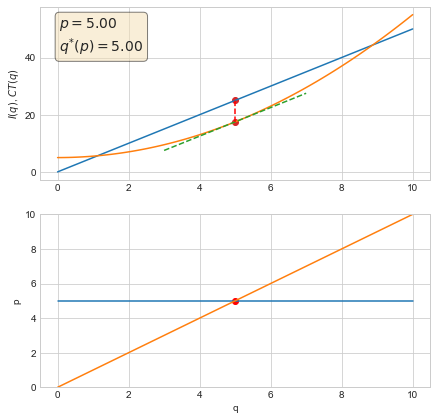

In [7]:
def Ing(p,q):
    return p*q
def CT(q,A = 0.5,a=1/2,b=0):
    return A + a*q**2+b*q
#interact(Ing_Cost_Plot2,p=(0.1,10,0.01),A=fixed(5),a=fixed(0.5),b=fixed(-0.0))
Ing_Cost_Plot2(p=5,A=5,a=0.5,b=0)

Veamos qué pasa si no se cumple la condición $p = \mbox{Cmg}(Q)$.

Si la empresa decide producir $\tilde{Q}$, con $\mbox{Cmg}(\tilde{Q}) > p$, vemos que la última unidad producida significa un costo mayor al 
ingreso que le reporta a la empresa, es decir una **pérdida**.

Qué pasa si la empresa decide producir $\tilde{Q}$, con $\mbox{Cmg}(\tilde{Q}) < p$. La última unidad reporta un beneficicio mayor a su costo, por lo tanto, la empresa debería producir una unidad adicional, de lo contrario está dejando de ganar. Lo cual también es una **pérdida económica**.

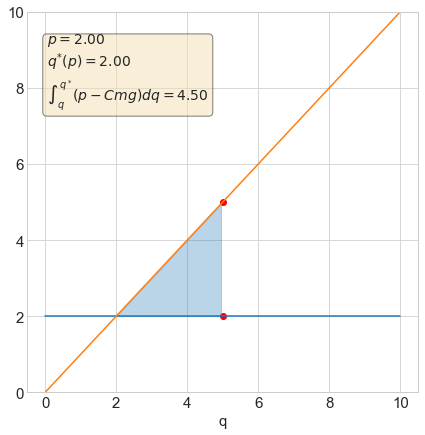

In [8]:
 def Margins(p,q,a,b):
    Qmax = 10
    N = 100
    Q = np.linspace(0,Qmax,N)
    q_m = (p-b)/(2*a)
    # Incializa el gráfico #
    
    
    D = (p*q_m - (a*q_m**2 + b*q_m) ) - (p*q -(a*q**2+b*q))
    
    fig, axes = plt.subplots(figsize=(7,7))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = '\n'.join((
        r'$p=%.2f$' % (p, ),
        r'$q^{*}(p)=%.2f$' % (q_m, ),
        r'$\int_{q}^{q^*}(p-Cmg)dq = %.2f$' % (D, )))
    axes.text(0.05, 0.95, textstr, transform=axes.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    axes.plot(Q,np.linspace(p,p,N))
    axes.plot(Q,2*a*Q+b)
    #axes.plot(np.linspace())
    axes.scatter(q,p,color='red')
    axes.scatter(q,2*a*q+b, color='red')
    
    if q >= q_m:
        I = ((2*a*Q+b < q ) & (2*a*Q+b > q_m))
    else:
         I = ((2*a*Q+b > q ) & (2*a*Q+b < q_m))
    
    axes.fill_between(Q, 2*a*Q+b, np.linspace(p,p,N), where = I, color='C0', alpha=0.3)
    #plt.xlabel(r'q')
    #plt.ylabel(r'p')
    plt.xlabel(r'q')
    
    plt.rc('font', size=15)          # controls default text sizes
    #plt.ylabel(r'$I(q)$, $CT(q)$')
    plt.ylim(0,2*a*Qmax+b)
    

Margins(2,5,1/2,0)
#interact(Margins,p =(0.1,4,0.1), q = (0.1,6,0.1), a = fixed(1/2), b = fixed(0))

## Función de oferta

¿Podríamos decir entonces que la función de oferta es $p=\mbox{Cmg}(q)$? No exactamente.

Como vimos en el gráfico anterior, la condición $p=\mbox{Cmg}(q)$ no garantiza que la empresa logre ganancias positivas. Si el precio es muy bajo podría ser más conveniente no producir nada en lo absoluto.

La condición para que la empresa produzca es $\Pi(Q) \geq 0$, lo que es equivalente a 

$p\cdot Q \geq CT(Q)$

$(p\cdot Q)/Q \geq CT(Q)/Q$

$p\geq CM(Q)$

Pero sabemos que si la empresa decide producir óptimamente se cumple que $p= \mbox{Cmg}(Q)$, por lo tanto

$\mbox{Cmg}(Q)\geq CM(Q)$

Por lo tanto, la cantidad mínima $Q^{Min}$ que producirá la empresa es la que cumpla con

$\mbox{Cmg}(Q^{Min}) = CM(Q^{Min})$

Equivalentemente, el precio mínimo para que la empresa produzca es $p^{Min}= \mbox{Cmg}(Q^{Min})$

En consecuencia, la función de oferta es $p =  \mbox{Cmg}(Q) \mbox{ si } Q \geq Q^{Min}$

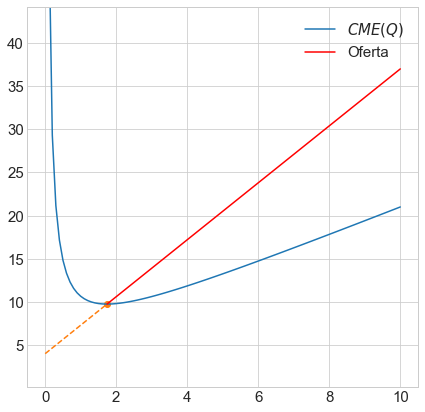

In [19]:
def P_Min(a = 1/2, b = 0, A = 4, Of = 0):
    
    def CT(Q, a, b, A):
        return a*Q**2+b*Q+A
    def CME(CT,Q):
        return CT(Q)/Q 

    fig, axes = plt.subplots(figsize=(7,7))
    # 2*a*Q +b = a*Q+b +A/Q
    # aQ**2 = A 
    # Q = sqrt(A/a)
    Qmax = 10
    N = 100
    Q = np.linspace(0.1,Qmax,N)
    axes.plot(Q,CME(lambda Q:CT(Q,a = a,b = b, A = A),Q), label = r"$CME(Q)$")
    if Of == 0:
        axes.plot(Q,2*a*Q+b, label = r"$Cmg(Q)$")
        plt.ylim(0.1, np.max(CME(lambda Q:CT(Q,a = 2,b = 4, A = 4),Q)))
        plt.legend()
    elif Of == 1:
        q_min = np.sqrt(A/a)
        Q_min = np.linspace(0, q_min, N)
        Q_ofe = np.linspace(q_min, Qmax, N)
        axes.plot(Q_min,2*a*Q_min+b, linestyle = "dashed")
        axes.plot(Q_ofe,2*a*Q_ofe+b, label = r"Oferta", color = 'red' )
        axes.scatter(q_min,2*a*q_min+b, color = 'C1')
        plt.ylim(0.1, np.max(CME(lambda Q:CT(Q,a = 2,b = 4, A = 4),Q)))
        plt.legend()
    plt.rc('font', size=15) 


#interact(P_Min, a = (0.5,2,0.05), b = (0,4,0.1), A = (0.1,5,0.1))
P_Min(a = 1.65, b = 4, A = 5, Of = 1)

## El rol de algunos supuestos

Hemos supuesto que el problema de maximizar $\Pi(Q) = p\cdot Q -CT(Q)$ tiene solución, dejando implícito un supuesto fundamental.

$\frac{d^2}{d Q^2} \Pi(Q) < 0$

lo que es equivalente a 

$\frac{d^2}{d Q^2} CT(Q) > 0$

# Impuestos

## Impuesto a la renta

¿Qué pasa si se pone un impuesto $\tau$ al beneficio total de la empresa? El beneficio de la empresa es $(1-\tau)\cdot \Pi(Q)$. Sin embargo, la decisión de la empresa no cambia.

$(1-\tau)p = (1-\tau)\mbox{Cmg}(Q)$

$p=\mbox{Cmg}(Q)$

Es decir, llegamos a la misma condición anterior. Por lo tanto, la decisión de producción óptima es la misma.

¿Por qué se da este resultado poco intuitivo? Porque el beneficio por unidad (i.e. el precio) disminuye en la misma proporción en que disminuye el costo por unidad (i.e. el costo marginal).  Luego, el punto en el que se igualan sigue siendo el mismo. 

$\Pi(Q) = pQ - CT(Q)$ aplico un impuesto $\tau$

El nuevo beneficio es $(1-\tau) \Pi(Q) = (1-\tau)(pQ - CT(Q))$

$= (1-\tau)pQ -(1-\tau)CT(Q)$

Para econtrar el óptimo derivamos

$p(1-\tau) = Cmg(Q) (1-\tau)$

Simplificamos

$p = cmg(Q)$

## Impuesto de suma alzada

¿Qué pasa si se pone un impuesto de suma alzada $T$, en que el nuevo beneficio sea $\Pi(Q)-T$?

Evidentemente la condición de primer orden no cambia. Sin embargo, sí puede afectar el tamaño mínimo de producción necesario para que la empresa produzca.

## Impuesto por unidad

¿Qué pasa si se cobra el IVA (u otro impuesto ad valorem)?
Donde el beneficio ahora es

$\tilde{\Pi(Q)} = (P-\tau)Q -CT(Q)$

Derivamos:

$p -\tau  = Cmg(Q)$

Luego, la función de oferta es 

$p = Cmg(Q) +\tau$

Precio mínimo = -0.6896293536229336 

Cantidad mínima = 1.1447142534750214 



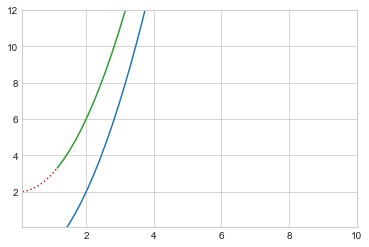

In [3]:
import EcoAmb as EA
P1 = EA.Producer(lambda Q:1/3*Q**3-2*Q )
P2 = EA.Producer(lambda Q:1/3*Q**3-2*Q)

P1.t = 0
P1.T = 1
P2.T = 1
P2.t = 4
print('Precio mínimo =', P1.Qmin_O()[1],'\n')
print('Cantidad mínima =', P1.Qmin_O()[0],'\n')
P1.Plot_Oferta()
P2.Plot_Oferta()

## Impuesto ad valorem

<p>Ahora se ponde un impuesto tipo IVA. Es decir, por cada unidad vendida se paga un porcentaje $\lambda$ del precio final.</p>
<p>$\tilde{\Pi}(Q) = (1-\lambda)P \cdot Q -CT(Q)$</p>

<p>Derivamos:</p>

$(1-\lambda)P = \mbox{Cmg}(Q)$

Luego, la nueva curva de oferta es 

$P = \frac{ \mbox{Cmg}(Q)}{1-\lambda}$

En el ejemplo siguiente, vemos un impuesto del 30\%

Precio mínimo = -0.6896293536229336 

Cantidad mínima = 1.1447142534750214 



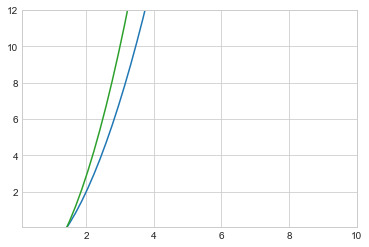

In [4]:
import EcoAmb as EA
P1 = EA.Producer(lambda Q:1/3*Q**3-2*Q )
P2 = EA.Producer(lambda Q:1/3*Q**3-2*Q)

P1.t = 0
P1.T = 1
P2.T = 1
P2.t = 0
P2.l = 0.3
print('Precio mínimo =', P1.Qmin_O()[1],'\n')
print('Cantidad mínima =', P1.Qmin_O()[0],'\n')
P1.Plot_Oferta()
P2.Plot_Oferta()

# Programación

In [6]:
# Preámbulo
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
from mpl_toolkits.mplot3d import Axes3D # perspectiva 3d
from matplotlib import cm # mapas de colores
plt.style.use('seaborn-whitegrid') # estilo de gráficos
import numpy as np
from ipywidgets import interact, fixed # Para hacer gráficos interactivos

def Ing_Cost_Plot(p,A,a,b):
    Qmax = 10
    Q = np.linspace(0,Qmax,100)
    IQ = Ing(p,Q)
    CTQ = CT(Q,A = A,a=a,b=b)
    fig, axes = plt.subplots( figsize=(7,7))
    axes.plot(Q,IQ, label= r"I(q)")
    axes.plot(Q,CTQ, label = r"CT(q)")
    qm = (p-b)/(2*a)
    Cm = CT(qm,A = A,a=a,b=b)
    Im = Ing(p,qm)
    m = 2*a*qm+b
    c = Cm-m*qm
    Q_Slope = np.linspace(qm-2,qm+2,100)
    C_Slope = c + m*Q_Slope
    axes.plot(Q_Slope,C_Slope,linestyle='dashed', color='C2')
    axes.scatter(qm,Cm,color='C3')
    axes.scatter(qm,Im,color='C3')
    Y = np.linspace(np.min([Cm,Im]),np.max([Cm,Im]),100)
    X = np.linspace(qm,qm,100)
    axes.plot(X,Y,linestyle='dashed',color='red')
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    #plt.rc('font', size=10)          # controls default text sizes
    plt.xlabel(r'q')
    plt.ylabel(r'$I(q)$, $CT(q)$')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = '\n'.join((
        r'$p=%.2f$' % (p, ),
        r'$q^{*}(p)=%.2f$' % (qm, )))
    axes.text(0.05, 0.95, textstr, transform=axes.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    plt.ylim(0,CT(Qmax,A = A,a=a,b=b))
    #plt.legend()
    
def Ing_Cost_Plot2(p,A,a,b):
    Qmax = 10
    N = 100
    Q = np.linspace(0,Qmax,N)
    IQ = Ing(p,Q)
    CTQ = CT(Q,A = A,a=a,b=b)
    # Incializa el gráfico #
    fig, axes = plt.subplots(2,1, figsize=(7,7))
    axes[0].plot(Q,IQ, label= r"I(q)")
    axes[0].plot(Q,CTQ, label = r"CT(q)")
    qm = (p-b)/(2*a)
    Cm = CT(qm,A = A,a=a,b=b)
    Im = Ing(p,qm)
    m = 2*a*qm+b
    c = Cm-m*qm
    Q_Slope = np.linspace(qm-2,qm+2,100)
    C_Slope = c + m*Q_Slope
    axes[0].plot(Q_Slope,C_Slope,linestyle='dashed', color='C2')
    axes[0].scatter(qm,Cm,color='C3')
    axes[0].scatter(qm,Im,color='C3')
    Y = np.linspace(np.min([Cm,Im]),np.max([Cm,Im]),100)
    X = np.linspace(qm,qm,100)
    axes[0].plot(X,Y,linestyle='dashed',color='red')
    #plt.xlabel(r'q')
    #plt.ylabel(r'$I(q)$, $CT(q)$')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = '\n'.join((
        r'$p=%.2f$' % (p, ),
        r'$q^{*}(p)=%.2f$' % (qm, )))
    axes[0].text(0.05, 0.95, textstr, transform=axes[0].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.ylim(0,CT(Qmax,A = A,a=a,b=b))
    axes[1].plot(Q,np.linspace(p,p,N))
    axes[1].plot(Q,2*a*Q+b)
    axes[1].scatter(qm,p,color='red')
    #plt.xlabel(r'q')
    #plt.ylabel(r'p')
    plt.xlabel(r'q')
    
    axes[0].set(ylabel=r'$I(q)$, $CT(q)$')
    axes[1].set(xlabel=r'q', ylabel=r'p')
    #plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('font', size=15)          # controls default text sizes
    #plt.ylabel(r'$I(q)$, $CT(q)$')
    plt.ylim(0,2*a*Qmax+b)

